In [37]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [14]:
len(train_labels)

60000

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

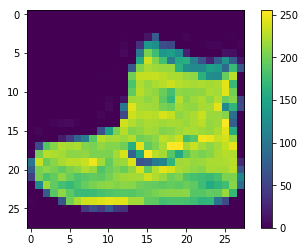

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
train_images = train_images / 255.0

test_images = test_images / 255.0

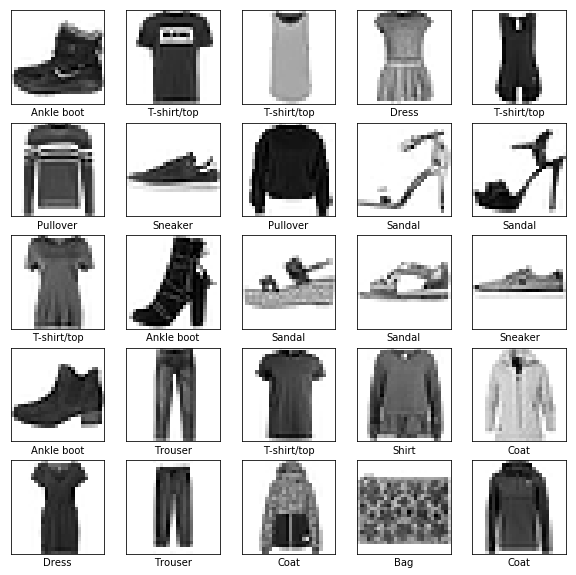

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 6s 94us/sample - loss: 2.3028 - accuracy: 0.0995
Epoch 2/100
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3027 - accuracy: 0.1002
Epoch 3/100
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3028 - accuracy: 0.0994
Epoch 4/100
60000/60000 [==============================] - 4s 66us/sample - loss: 2.3028 - accuracy: 0.0987
Epoch 5/100
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3028 - accuracy: 0.0983
Epoch 6/100
60000/60000 [==============================] - 4s 72us/sample - loss: 2.3028 - accuracy: 0.0967
Epoch 7/100
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3028 - accuracy: 0.0977
Epoch 8/100
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3028 - accuracy: 0.1004
Epoch 9/100
60000/60000 [==============================] - 4s 60us/sample - loss: 2.3028 - accuracy: 0.0997
Epoch 10/100
60000/60000 [==

60000/60000 [==============================] - 4s 64us/sample - loss: 2.3027 - accuracy: 0.0982
Epoch 77/100
60000/60000 [==============================] - 4s 68us/sample - loss: 2.3028 - accuracy: 0.0996
Epoch 78/100
60000/60000 [==============================] - 4s 63us/sample - loss: 2.3028 - accuracy: 0.0989
Epoch 79/100
60000/60000 [==============================] - 4s 61us/sample - loss: 2.3028 - accuracy: 0.1000
Epoch 80/100
60000/60000 [==============================] - 4s 62us/sample - loss: 2.3028 - accuracy: 0.0993
Epoch 81/100
60000/60000 [==============================] - 4s 61us/sample - loss: 2.3028 - accuracy: 0.0983
Epoch 82/100
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3027 - accuracy: 0.0989
Epoch 83/100
60000/60000 [==============================] - 4s 59us/sample - loss: 2.3028 - accuracy: 0.0968
Epoch 84/100
60000/60000 [==============================] - 4s 59us/sample - loss: 2.3028 - accuracy: 0.0973
Epoch 85/100
60000/60000 [======

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 2.3027 - accuracy: 0.1000
Test accuracy: 0.1


In [42]:
predictions = model.predict(test_images)

In [43]:
predictions[0]

array([0.09979993, 0.1018569 , 0.09938858, 0.10025804, 0.1000924 ,
       0.09745085, 0.09885707, 0.09978715, 0.10135863, 0.10115037],
      dtype=float32)

In [44]:
np.argmax(predictions[0])

1

In [45]:
test_labels[0]


9

In [46]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

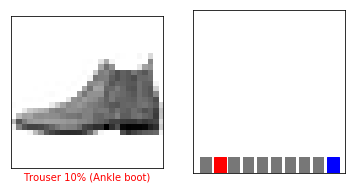

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

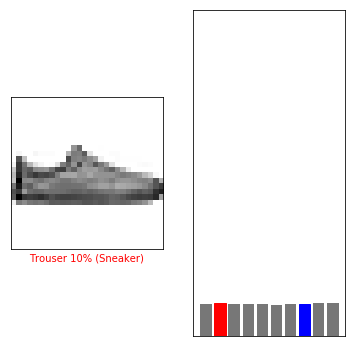

In [54]:
i = 12
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

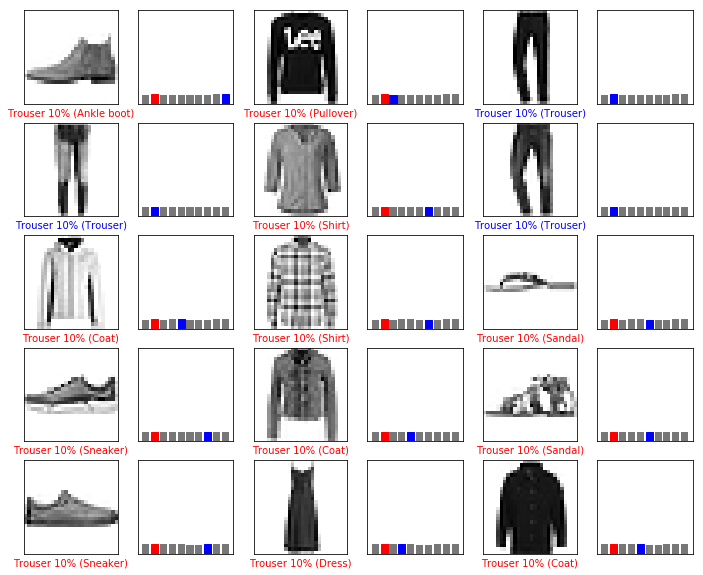

In [49]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [55]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.09979993 0.1018569  0.09938858 0.10025804 0.1000924  0.09745085
  0.09885707 0.09978715 0.10135863 0.10115037]]


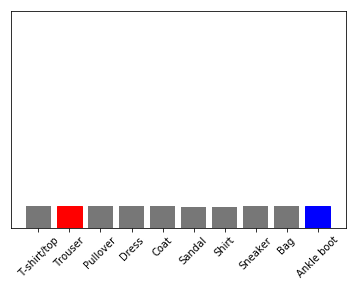

In [58]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [59]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

1
